In [1]:
#| echo: false
#| warning: false
library(tidyverse)
options(repr.matrix.min.rows = 6)
options(tibble.print_min = 6)

library(ggthemr)
ggthemr("light") #, layout = "minimal")
theme_set(theme_get())
theme_update(panel.background = element_rect(fill = "white"))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.2.0
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


통계에서 데이터의 타입은 대략 다음과 같이 나누어짐

- continuous / discrete
- quantitative / qualitative
- categorical unordered (nominal) / categorical ordered (ordinal)
  - 성별, 지역 / 등급, 랭킹
  - ordinal: 등간격을 가정
    - 퀄리티 good, fair, poor는 등간격이라고 봐야하는가?
    - 랭킹은?
    - 선호도 1, 2, …, 8; continuous?
    - 임금 구간?
- ratio, interval을 나누기도 함
  - 0이 실제 의미있는 값일 때, 비율에 대해 말할 수 있음
  - 무게가 2배 더 나간다.
  - 날씨가 2배 더 덥다?

# Correlation
A measure of association; 상관관계

### **Pearson’s correlation coefficient: *r***

- Linear relationships; x와 y의 **선형적** 연관성; 범위 [-1, 1]  
- x로부터 y를 얼마나 정확히 **예측**할 수 있는가? (선형관계로부터)
- x와 y의 정보는 얼마나 중복(redundant)되는가?

    ![](images/corr1.png){width=500}

### **Multiple correlation coefficient: *R***

- Extented correlation: 예측치와 관측치의 pearson’s correlation
  
    ![](images/corr2.png){width=500}


- 자연에서 선형관계는 거의 관찰되지 않음
- 반대로, 사회과학의 지표들 사이에서는 대부분 대략적인 선형관계가 나타남
  - 주요 예외로는 연령이 포함하는 관계: 나이에 따른 기억력 감퇴

## Linear correlation의 계산

교수의 연봉(salary), 학위를 받은 후 지난 시간(time since Ph.D.), 출판물의 수(pubs)의 관계  
Data: [c0301dt.csv](https://www.dropbox.com/s/c5gb1lme5crkql5/C0301DT.csv?dl=0)

In [2]:
#| echo: false
acad0 <- read_csv("data/c0301dt.csv")
acad0 |> print()


Rows: 15 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): time, pubs, salary

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 15 × 3
    time  pubs salary
   <dbl> <dbl>  <dbl>
 1     3    18  51876
 2     6     3  54511
 3     3     2  53425
 4     8    17  61863
 5     9    11  52926
 6     6     6  47034
 7    16    38  66432
 8    10    48  61100
 9     2     9  41934
10     5    22  47454
11     5    30  49832
12     6    21  47047
13     7    10  39115
14    11    27  59677
15    18    37  61458


The formula for Pearson's correlation coefficient; the product moment correlation coefficient

$X, Y$에 대한 standardize (Z score); $\displaystyle z_X = \frac{X-M_X}{sd_X}, \thinspace z_Y = \frac{Y-M_Y}{sd_Y}$

$r_{XY} = \displaystyle 1 - \frac{\sum{(z_X - z_Y)^2}}{2n}$ &emsp; $z_X, z_Y$ : 각각 standardized $X, Y$ 

$r_{XY} = \displaystyle\frac{\sum_{i=1}^{n}{(x_i - \bar x)(y_i - \bar y)}}{\sqrt{\sum_{i=1}^{n}{(x_i - \bar x)^2}} \sqrt{\sum_{i=1}^{n}{(y_i - \bar y)^2}}}$ &emsp;
$\bar x : X$ 의 평균, &nbsp; $\bar y :Y$ 의 평균

In [3]:
df <- acad0 |>
    mutate(
        z_time = (time - mean(time)) / sd(time),
        z_pubs = (pubs - mean(pubs)) / sd(pubs),
        diff = z_time - z_pubs,
        squared = diff^2
    ) |>
    print()


# A tibble: 15 × 7
    time  pubs salary  z_time  z_pubs   diff squared
   <dbl> <dbl>  <dbl>   <dbl>   <dbl>  <dbl>   <dbl>
 1     3    18  51876 -1.02   -0.140  -0.880  0.774 
 2     6     3  54511 -0.364  -1.23    0.861  0.741 
 3     3     2  53425 -1.02   -1.30    0.278  0.0772
 4     8    17  61863  0.0728 -0.212   0.285  0.0812
 5     9    11  52926  0.291  -0.646   0.938  0.879 
 6     6     6  47034 -0.364  -1.01    0.644  0.415 
 7    16    38  66432  1.82    1.31    0.514  0.264 
 8    10    48  61100  0.510   2.03   -1.52   2.31  
 9     2     9  41934 -1.24   -0.791  -0.447  0.200 
10     5    22  47454 -0.583   0.150  -0.732  0.536 
11     5    30  49832 -0.583   0.728  -1.31   1.72  
12     6    21  47047 -0.364   0.0772 -0.441  0.195 
13     7    10  39115 -0.146  -0.719   0.573  0.328 
14    11    27  59677  0.728   0.511   0.217  0.0471
15    18    37  61458  2.26    1.23    1.02   1.05  


In [4]:
print(1 - sum(df$squared) / (2 * 14))

[1] 0.6566546


In [5]:
cor(acad0) |>
    round(2) |>  # 반올림 함수
    print()

       time pubs salary
time   1.00 0.66   0.71
pubs   0.66 1.00   0.59
salary 0.71 0.59   1.00


상관계수 크기에 대한 guidline

- $| \thinspace r\thinspace|<0.3$: weak
- $0.3\le|\thinspace r\thinspace|<0.5$: moderate
- $|\thinspace r\thinspace|>0.5$ : strong relationship

상관계수를 제곱한 $r^2$ 는 변량의 설명 정도를 나타내주는 계수; **결정계수** ($R^2$, $R$ squared)  
이는 좀 더 해석가능한 값이 되고, **strength of association**를 나타내는 주요한 지표임.  
뒤에서 자세히 다룸.

::: {.callout-tip}
```r
# Base R의 cor()의 옵션들
cor(acad0, use = "pairwise.complete.obs") # NA의 처리: pairwise deletion

# psych 패키지의 corr.test() 이용
library(psych) 
corr.test(acad0) # NA를 pairwise deletion으로 처리해줌

## Correlation matrix 
##        time pubs salary
## time   1.00 0.66   0.71
## pubs   0.66 1.00   0.59
## salary 0.71 0.59   1.00

## Sample Size 
## [1] 15
## Probability values (Entries above the diagonal are adjusted for multiple tests.) 
##        time pubs salary
## time   0.00 0.02   0.01
## pubs   0.01 0.00   0.02
## salary 0.00 0.02   0.00
## 
##  To see confidence intervals of the correlations, print with the short=FALSE option
```
:::

## 시각화를 통한 상관계수

`corrgram()`, `ggpairs()`

In [6]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 60)

[vignette for corrgram](https://cran.r-project.org/web/packages/corrgram/vignettes/corrgram_examples.html)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


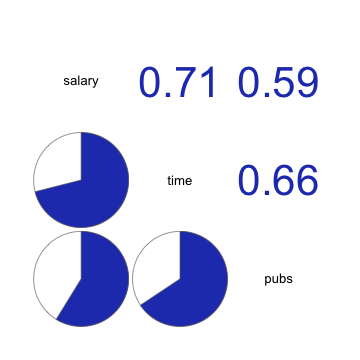

In [7]:
library(corrgram)
corrgram(acad0,
         order = TRUE,  # 상관계수가 높은 변수들을 가까이 위치시킴
         upper.panel = panel.cor,   # 상관계수
         lower.panel = panel.pie,  # 파이 차트
)

::: {.callout-tip collapse=true}
#### tip: use a function
```r
corgrm <- function(df, order = TRUE){
    corrgram(df,
         order = order,  # 상관계수가 높은 변수들을 가까이 위치시킴
         upper.panel = panel.cor,   # 상관계수
         lower.panel = panel.pie,  # 파이 차트
    )
}

corgrm(acad0)
corgrm(acad0, order = FALSE)
```
:::

In [8]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 70)

Data from the 1985 Current Population Survey (CPS85)  
임금, 교육수준, 연차, 나이, 성별 간의 상관관계

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


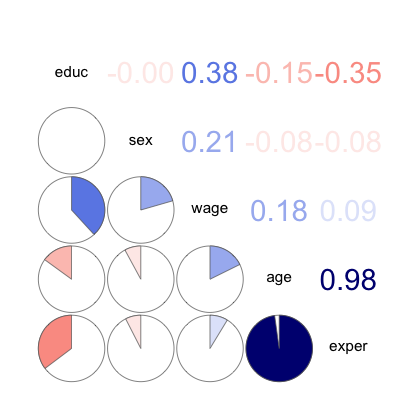

In [9]:
cps <- mosaicData::CPS85

cps |>
    select(wage, educ, exper, age, sex) |>
    mutate(sex = as.numeric(sex)) |>   # factor를 숫자로 변환: 1, 2, ...
    corrgram(
         order = TRUE, 
         upper.panel = panel.cor, 
         lower.panel = panel.pie, 
    )


In [10]:
#| echo: false
options(repr.plot.width = 7, repr.plot.height = 5, repr.plot.res = 70)

Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”
Warning message in par(usr):
“argument 1 does not name a graphical parameter”


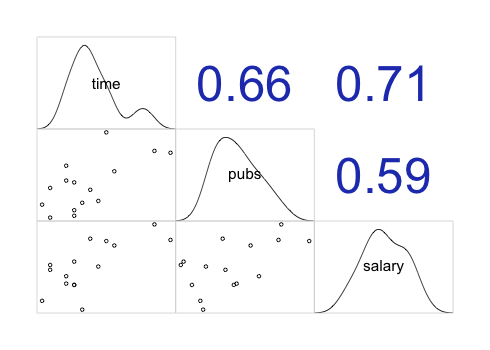

In [11]:
corrgram(acad0,
         order = FALSE,
         lower.panel = panel.pts,
         upper.panel = panel.cor,
         diag.panel = panel.density
)

In [12]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 100)

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



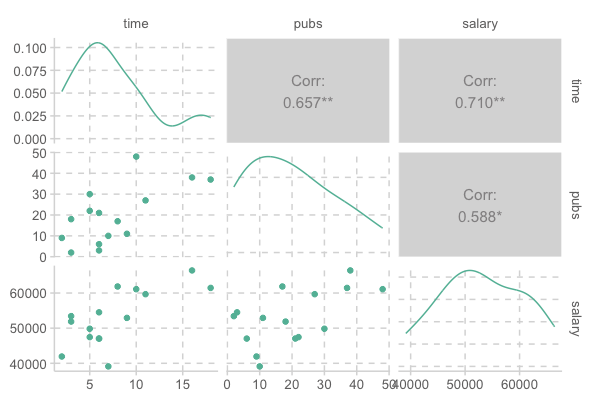

In [13]:
# GGally 패키지의 ggpairs()
GGally::ggpairs(acad0)

::: {.callout-tip collapse=true}
#### Tip: includes fitted lines
```r
trendlines <- function(data, mapping, ...){
    ggplot(data = data, mapping = mapping) + 
        geom_point(alpha = .6) + 
        geom_smooth(method = loess, se = FALSE, color = "orange", ...) +
        geom_smooth(method = lm, se = FALSE, color = "skyblue", ...)
}

ggpairs(acad0, columns = 1:3, lower = list(continuous = trendlines))
```
![](images/plot1.png){width=520}
:::

::: {.callout-note}

명목변수인 경우에도 measure of association을 계산하는 방법이 있는데, 자세한 사항은 [*Measures of Association - How to Choose?*](https://journals.sagepub.com/doi/pdf/10.1177/8756479308317006) 참조

R에서 계산은 `psych::corr.test()`의 옵션 method를 "pearson", "spearman", "kendall" 중 선택

명목변수의 예

- 한 변수가 binary 인 경우: 물건의 가격 ~ 구매 여부
- 두 변수가 모두 binary 인 경우: 남녀 ~ 합격 여부
- 두 변수가 rank(ordinal) 인 경우: 다이아몬드 투명도(clarity)와 컬러(color)

binary인 경우: 0, 1로 코딩  
rank인 경우: 1, 2, 3… 로 코딩

:::

# Regression

## Simple linear/regression models

단순한 상관관계를 넘어서서,  
Y가 X에 의해 영향을 받거나 X에 의해 예측되는 변수라는 연구자의 가정이 있음.  

- Y: 종속변수 (dependent variable), regressand, **response**  
- X: 독립변수 (independent variable), regressor, **예측변수 (predictor)**

선형관계임을 가정하고, 데이터에 **가장 근접한** 직선을 구함  
이 직선을 주어진 데이터로부터 두 변수 간의 관계를 가장 잘 represent하는 **model** (모형)이라고 말함.  
이는 확장된 의미에서 물리법칙에서 변수 간의 관계를 수학적 식으로 표현하고, 자연의 질서를 모델링한 것으로 이해할 수 있는 것과 같음.


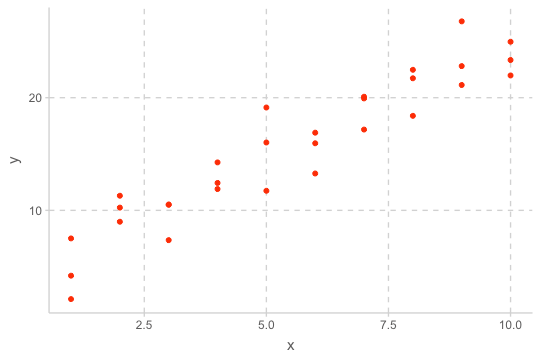

In [14]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 90)
library(modelr)

ggplot(sim1, aes(x, y)) + 
  geom_point(color = "orangered")

- 패턴: 강한 선형 관계
- 선형 모델 family인 &nbsp; $Y = a_2 X + a_1$을 세움
- 무수히 많은 $a_1, a_2$의 값들 중 위 데이터에 **가장 가까운** 값을 찾음
  - 이를 "fit a model to data"라고 하고, 특정 모델을 fitted model이라고 함
  - 그 예로, 데이터와 꽤 가까운 임의의 20개의 선형 모델을 그려보면

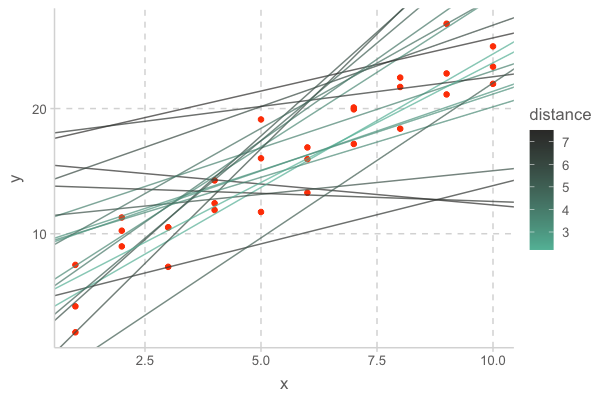

In [15]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 100)

set.seed(123)
models <- tibble(
    a1 = runif(250, -20, 40), # r(random)-unif(uniform distribution)
    a2 = runif(250, -5, 5)
)

model1 <- function(a, data) {
  a[1] + data$x * a[2]
}

measure_distance <- function(mod, data) {
    diff <- data$y - model1(mod, data) # 실제값 - 모델 예측값
    sqrt(mean(diff^2))
}

sim1_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), sim1)
}

models <- models %>% 
  mutate(distance = purrr::map2_dbl(a1, a2, sim1_dist))

ggplot(sim1, aes(x, y)) + 
  geom_point(colour = "orangered") + 
  geom_abline(
    aes(intercept = a1, slope = a2, colour = distance), 
    data = filter(models, rank(distance) <= 20),
    alpha = .7
  )



- 즉, 선형모델 중 데이터에 가장 **가까운** 모델을 찾고자 하는데,  
- 가깝다는 것을 정의하기 위해 데이터와 모델과의 **거리**를 정의해야 함; $d =|~data - model~|$ 
- 그 중 모델과 데이터의 수직 차이 (**잔차; residuals**)의 총체로 거리를 정의할 수 있음

![](images/model2.png){width=600}

- 특히, 다음과 같은 RMSE (root-mean-square deviation)을 기본적인 거리로 정의하고

&emsp; &emsp; $RMSE = \displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n}{(Y_i -\hat Y_i)^2}},$ &emsp; $Y_i -\hat Y_i$ : *residual* (잔차)

- 최적의 모델은 이 거리를 최소로 하며,
- 이 때, 잔차의 합은 0; &nbsp; $\displaystyle \sum_{i=1}^{n}{(Y_i -\hat Y_i)} = 0$

> Mean absolute error: $MAE = \displaystyle\frac{1}{n} \sum_{i=1}^{n}{|~Y_i -\hat Y_i~|}$ 
: 이상치에 덜 민감함

이 거리를 이용해서 모델의 파라미터를 추정하는 것을 ordinary least square (OLS) esimate이라고 함

R은 여러 형태의 a family of models을 구성할 수 있는 효율적인 툴을 제공

- Linear (regression) models: $Y = a_0 + a_1 X_1 + a_2 X_2 + ~... ~ + a_n X_n$
    - 앞의 예는 $n=1$ 에 해당하며, $y =a_0 +a_1X_1$에 대해서 다음과 같이 편리하게 적용할 수 있음
  
        ```r
        sim1_mod <- lm(y ~ x, data = sim1)

        coef(sim1_mod) # 모델의 parameter 즉, coefficients를 내줌
        #> (Intercept)           x 
        #>    4.220822    2.051533   # 위에서 구한 파라미터값과 동일함
        ```
      - 즉, 앞의 데이터에 최적인 선형 모형은 $Y = 4.22 + 2.05X$  
      - `lm()`은 **formula** `y ~ x`를  $Y =a_0 +a_1X$ 로 변환해 줌; Y 절편은 formula에서 생략
      - Linear models의 경우 위에서 처럼 수치 을 이용하지 않고 방정식의 해를 구하듯 exact form으로 최소값을 구함
    - $n=2$ 인 경우인 두 변수 $X_1$, $X_2$로 $Y$를 예측하는 경우,
  
        ```r
        lm(y ~ x1 + x2, data = df)
        ```

::: {.callout-note}
This formula notation is called “Wilkinson-Rogers notation”, and was initially described in *Symbolic Description of Factorial Models for Analysis of Variance* by G. N. Wilkinson and C. E. Rogers

위에서 `y ~ x`라는 formula는 `x, y`라는 변수를 바로 evaluate하지 않고, $Y = a_0 + a_1X$로 해석되어 함수로 전환됨
:::

## Visualising models

Fitted models을 이해하기 위해 모델이 예측하는 부분(prediction)과 모델이 놓친 부분(residuals)을 시각화해서 보는 것이 유용함

- **Predictions**: the pattern that the model has captured
- **Residuals**: what the model has missed; **통계 분석의 핵심 요소**
  
- 앞서 구한 모형 $Y = 4.22 + 2.05X$ 을 데이터와 함께 그려보면,

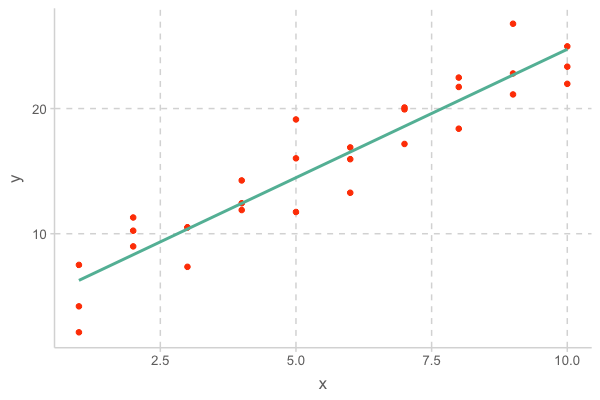

In [16]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 100)
library(modelr)

sim1_mod <- lm(y ~ x, data = sim1)
sim1 <- sim1 |>
  add_predictions(sim1_mod) |>
  add_residuals(sim1_mod)

ggplot(data = sim1) +
  geom_point(aes(x = x, y = y), colour = "orangered") +
  geom_line(aes(x = x, y = pred), data = sim1, linewidth = 1)

이 모형에 의한 예측값들(`pred`)과 잔차(`resid`)들은

In [17]:
#| echo: false
sim1 |> print(n = 8)

# A tibble: 30 × 4
      x     y  pred  resid
  <int> <dbl> <dbl>  <dbl>
1     1  4.20  6.27 -2.07 
2     1  7.51  6.27  1.24 
3     1  2.13  6.27 -4.15 
4     2  8.99  8.32  0.665
5     2 10.2   8.32  1.92 
6     2 11.3   8.32  2.97 
7     3  7.36 10.4  -3.02 
8     3 10.5  10.4   0.130
# … with 22 more rows


Residuals의 분포를 시각화해서 살펴보면,

- residuals의 평균은 항상 0
- residuals의 분포는 predictions이 관측치로부터 전반적으로 얼마나 벗어났는지에 평가할 수 있음

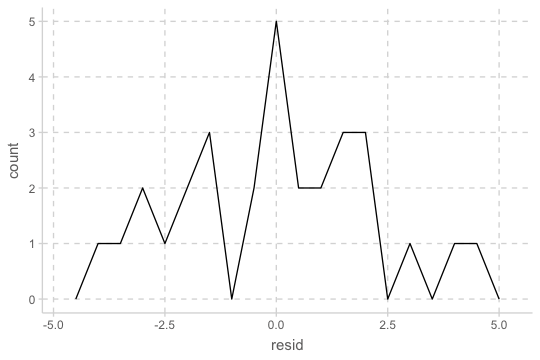

In [18]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 90)
ggplot(sim1, aes(resid)) + 
  geom_freqpoly(binwidth = 0.5)

예측 변수와 residuals의 관계를 시각화해서 보면,

- 이 residuals은 특별한 패턴을 보이지 않아야 모델이 데이터의 패턴을 잘 잡아낸 것으로 판단할 수 있음
- 또한 어떤 부분에서 예측이 벗어났는지도 판별할 수 있음

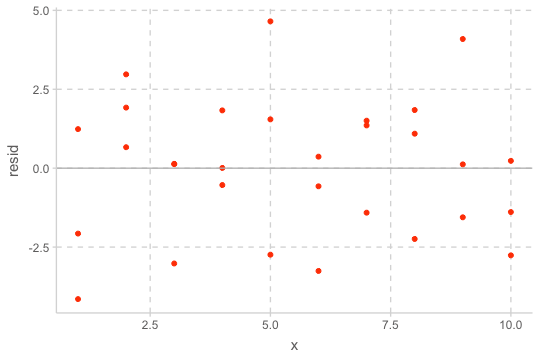

In [19]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 90)

ggplot(sim1, aes(x, resid)) +
    geom_point(color = "orangered") +
    geom_ref_line(h = 0, size = .5, colour = "grey")

- Residuals에 패턴이 보이는 경우: 모형을 수정!

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


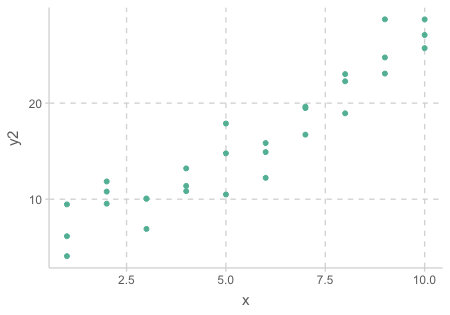

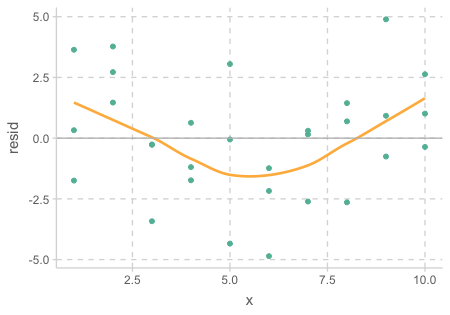

In [20]:
#| echo: false
#| layout-ncol: 2
options(repr.plot.width = 5, repr.plot.height = 3.5, repr.plot.res = 90)
library(modelr)
y <- sim1$y
x <- sim1$x
yy <- y + 0.2*(x-2.5)*(x-7.5)
sim1 <- sim1 |> 
  mutate(y2 = yy)

mod <- lm(y2 ~ x, data = sim1)

sim1 <- sim1 |> 
  add_residuals(mod)

sim1 |> 
  ggplot(aes(x = x, y = y2)) +
  geom_point()

sim1 |>
  ggplot(aes(x = x, y = resid)) +
  geom_point() +
  geom_smooth(se = FALSE) +
  geom_ref_line(h = 0, size = .5, colour = "grey")

## Case 1
교수의 연봉(`salary`)이 학위를 받은 후 지난 시간(`time` since Ph.D.)과 출판물의 수(`pubs`)에 의해 어떻게 영향을 받는가?
<br>

![](images/diagram1.png){width=500}

In [21]:
#| echo: false
acad0 |> print(n = 6)

# A tibble: 15 × 3
   time  pubs salary
  <dbl> <dbl>  <dbl>
1     3    18  51876
2     6     3  54511
3     3     2  53425
4     8    17  61863
5     9    11  52926
6     6     6  47034
# … with 9 more rows


In [22]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 4, repr.plot.res = 100)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


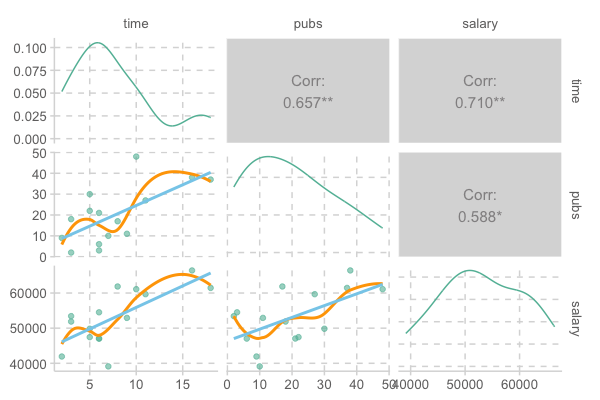

In [23]:
#| echo: false
trendlines <- function(data, mapping, ...) {
    ggplot(data = data, mapping = mapping) +
        geom_point(alpha = .6) +
        geom_smooth(method = loess, span = 2, se = FALSE, color = "orange", ...) +
        geom_smooth(method = lm, se = FALSE, color = "skyblue", ...)
}
GGally::ggpairs(acad0, columns = 1:3, lower = list(continuous = trendlines))

### 모형 세우기
    
선형모형: `lm(y ~ x)`

- $\hat{Y} = a_0 + a_1X$, &nbsp; ($\hat{Y}$: 예측치)
- 또는 $Y = a_0 + a_1X +e$, &nbsp; ($Y$: 관측치, $e$: 잔차, 에러)
- $a_1$: 기울기 ($X$가 1 증가할 때, $Y$의 증가량), &nbsp; $a_0$: 절편 ($X$가 0일 때, $Y$의 값)

![](images/model3.png){width=500}

`mod1 <- lm(salary ~ time, data = acad0)`: $\widehat{salary} = a_0 + a_1time$

`mod2 <- lm(salary ~ pubs, data = acad0)`: $\widehat{salary} = a_0 + a_1pubs$

### Fit a model to data
데이터에 가장 근접한 모델

In [24]:
#| output: false
mod1 <- lm(salary ~ time, data = acad0)
mod2 <- lm(salary ~ pubs, data = acad0)

coef(mod1)
## (Intercept)        time 
##   43658.594    1224.392
coef(mod2)
## (Intercept)        pubs 
##   46357.449     335.526

(Intercept)        time 
  43658.594    1224.392

(Intercept)        pubs 
  46357.449     335.526

- Model 1:   $\widehat{salary} = \$43,659 + \$1,224\:time$
    
    $a_1$: 학위를 받은 후 1년이 지날 때마다, 연봉은 $1,224 오름 (**표현에 주의!**)  
    $a_0$: 학위를 받은 후 0년일 때, 연봉은 $43,658; 0년이 의미있는가?
    
- Model 2 :   $\widehat{salary} = \$46,357 + \$336\:pubs$
    
    $a_1$: 출판물 1편을 추가로 발표하면, 연봉은 $336 오름 (**표현에 주의!**)  
    $a_0$: 출판물이 0편일 때, 연봉은 $46,357

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


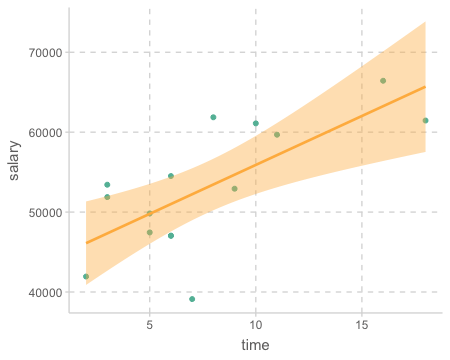

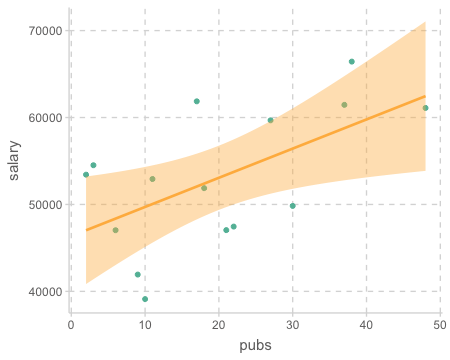

In [25]:
#| echo: false
#| layout-ncol: 2
options(repr.plot.width = 5, repr.plot.height = 4, repr.plot.res = 90)

acad0 %>% 
    ggplot(aes(x = time, y = salary)) +
    geom_point() +
    geom_smooth(method = "lm")

acad0 %>% 
    ggplot(aes(x = pubs, y = salary)) +
    geom_point() +
    geom_smooth(method = "lm")

연봉(`salary`)을 연차(`time`)로 예측하는 모델(`mod1`)에 대해서 prediction과 residuals 값을 구해보면  
단, 간편한 계산을 위해 `salary`를 1000으로 나누었으며, 51.876는 $51,876을 의미

- 아래 테이블에서 가령, 6년차인 교수의 연봉은 모형에 의해 $51,000로 예측되고,
- 2번째 교수의 경우 그 예측이 $3,510 정도 낮게 예측되었으며,
- 6번째 교수의 경우는 $3,9700 정도 높게 예측되었음
- 예측이 틀린 정도, 즉 잔차는 왜 생기는가? ...
  
  ::: {.callout-important}
  모형의 분석은 예측/**설명**되는 부분과 예측/**설명**되지 않는 부분으로 쪼개어 보는 것이 기본적인 시각  
  예들 들어, 연차로 연봉을 설명할 수는 있는 부분 vs. 연차로 연봉이 설명되지 않는 부분!
  :::

In [26]:
#| echo: false
library(modelr)
df <- acad0 |>
    select(time, salary) |>
    mutate(salary = salary / 1000)

mod1 <- lm(salary ~ time, data = df)

df <- df |>
    add_predictions(mod1) |>
    add_residuals(mod1) |>
    mutate("(pred-m)^2" = (pred - mean(pred))^2, "resid^2" = (resid)^2, "(salary-m)^2" = (salary - mean(salary))^2)

# knitr::kable(df, "simple", digits = 2)
as.data.frame(df |> round(2)) |> print()


   time salary  pred  resid (pred-m)^2 resid^2 (salary-m)^2
1     3  51.88 47.33   4.54      32.65   20.65         1.37
2     6  54.51 51.00   3.51       4.16   12.29         2.15
3     3  53.42 47.33   6.09      32.65   37.13         0.14
4     8  61.86 53.45   8.41       0.17   70.72        77.75
5     9  52.93 54.68  -1.75       2.67    3.07         0.01
6     6  47.03 51.00  -3.97       4.16   15.77        36.14
7    16  66.43 63.25   3.18     104.11   10.13       179.20
8    10  61.10 55.90   5.20       8.16   27.01        64.87
9     2  41.93 46.11  -4.17      48.14   17.42       123.47
10    5  47.45 49.78  -2.33      10.66    5.41        31.27
11    5  49.83 49.78   0.05      10.66    0.00        10.33
12    6  47.05 51.00  -3.96       4.16   15.67        35.98
13    7  39.12 52.23 -13.11       0.67  171.99       194.06
14   11  59.68 57.13   2.55      16.66    6.50        43.98
15   18  61.46 65.70  -4.24     160.07   17.97        70.77


In [156]:
#| echo: false
options(repr.plot.width = 8, repr.plot.height = 8, repr.plot.res = 100)

df2 <- df[5:7]
df2["id"] <- 1:15
df2 <- df2 |>
    pivot_longer(cols = 1:3, values_to = "values", names_to = "kind")
df2 <- df2 |> mutate(
    kind = factor(kind, levels = c("resid^2", "(pred-m)^2", "(salary-m)^2"))
)

p <- df2 |>
    ggplot(aes(y = id, x = values, color = kind)) +
    geom_point(size = 2) +
    facet_wrap(~kind, ncol = 1)

ggsave("images/plot_variance.png", width=8, height = 8)


::: {.callout-note collapse=true}
#### graphical representation
![](images/plot_variance.png){width=700}
:::

Column별로 더하면

In [27]:
#| echo: false
table1 <- bind_rows(df, colSums(df))[16, ]
as.data.frame(table1 |> round(2)) |> print()

  time salary   pred resid (pred-m)^2 resid^2 (salary-m)^2
1  115 795.68 795.68     0     439.75  431.73       871.48


우선, 연봉의 합 $\sum{Y}$ = 예측값의 합 $\sum{\hat{Y}}$ &nbsp;: $X$ 의 평균은 모형에 의해 Y의 평균으로 예측됨

::: {.callout-important}
**Partitioning of variances**

$\sum{(\hat{Y}-m)^2}=439.75$ : 연차의 변량 (**variation**)으로 모형에 의해 설명되는 (attribute/acount for) 연봉의 변량  
$\sum{(Y-\hat{Y})^2}=431.73$ : 연차의 변량 (**variation**)으로 모형에 의해  설명될 수 없는 (not attribute) 연봉의 변량  
$\sum{(Y-m)^2}=871.48$ : 연봉의 변량

이 세 값의 관계는 $\sum{(\hat{Y}-m)^2} + \sum{(Y-\hat{Y})^2} = \sum{(Y-m)^2}$

- Sum of squares (SS)로 부르며,  
- SSR, SSE, SSY (각각 sum of squares of Regression, Error, Y)

:::

위 값을 다시 N(=15)으로 나누면, 즉 column별 평균은

In [ ]:
#| echo: false
table2 <- bind_rows(df, colMeans(df))[16, ]
as.data.frame(table2 |> round(2)) |> print()

  time salary  pred resid (pred-m)^2 resid^2 (salary-m)^2
1 7.67  53.05 53.05     0      29.32   28.78         58.1


위의 관계는 **variance** (분산)으로 보면,

&emsp; $V(predictions) + V(residuals) = V(Y)$

이렇게 간결하게 쪼개지는 것은 predictions과 residuals이 서로 독립($r=0$)이 되기 때문으로 이해할 수 있음

- predictions $\hat{Y}$ 은 $X$ 의 일차 함수식으로 얻어진 것이므로 $X$ 와 $r=1$ 이 되고,
- residuals $Y-\hat{Y}=Y-T(X)$ 과 $\hat{Y}$이 상관이 있다면, $X$ 와 $Y-\hat{Y}$ 과의 상관이 존재해야하는데, 이는 OLS estimate에 어긋남 

  ```r
  # correlations with residuals
  #         pred time salary
  # resid  0.00 0.00  0.704
  # salary 0.71 0.71  1.000
  
  ```

다시 위의 식에서 $V(Y)$ 로 양변을 나누면

&emsp; $\displaystyle\frac{V(predictions)}{V(Y)} + \frac{V(residuals)}{V(Y)} = 1$

::: {.callout-important}

즉, "모형에 의해 설명되는 $Y$ 변량의 **비율**" + "모형에 의해 설명되지 않는 $Y$ 변량의 **비율**" = 1  
첫 항을 $R^2$ 라고 하고, **결정계수** 혹은 R squared라고 부름  
따라서, $1-R^2$ 는 설명되지 않는 변량의 비율이라고 할 수 있음

:::

$R^2$ 를 제곱근하면 $R$ 이 나오고, 이는 Pearson's correlation coefficient와 동일함; 

  - $R = cor(Y, X) = cor(Y, \hat{Y}=aX+b), ~a = r_{XY} \frac{sd_Y}{sd_X}$
  - $R$ 은 예측의 정확성에 대한 지표라고 이해할 수 있음

Overlap in variance of correlated variables  
![](images/ballantines.png){width=450}

::: {.callout-note collapse=true}
#### ANOVA
모형 자체에 대한 분석으로 ANOVA 결과는 `anova()`함수를 써서 볼 수 있음

- Residuals과 predictions에 대한 분산을 이용해
- residuals 변량 대비 얼마나 predictions의 변량이 얼마나 큰지로부터 F분포를 이용해 통계적 추론이 이루어짐

```r
anova(mod1)
# Analysis of Variance Table

# Response: salary
#           Df Sum Sq Mean Sq F value Pr(>F)   
# time       1 439.75  439.75  13.241  0.003 **
# Residuals 13 431.73   33.21                  
# ---
# Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
```
:::

다음은 SPSS 결과 테이블:  
![](images/anova.png){width=600}

In [29]:
summary(mod1)


Call:
lm(formula = salary ~ time, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.1143  -3.9644   0.0514   4.0251   8.4093 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  43.6586     2.9780  14.660 1.83e-09 ***
time          1.2244     0.3365   3.639    0.003 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.763 on 13 degrees of freedom
Multiple R-squared:  0.5046,	Adjusted R-squared:  0.4665 
F-statistic: 13.24 on 1 and 13 DF,  p-value: 0.003


::: {.callout-important}
$R^2$ 는 모형이 predictor들로부터 Y의 변량을 얼마나 예측/설명해주는지에 대한 지표로서 가장 널리 쓰임.  
다음의 두 경우는 1년의 연차가 $1,224의 연봉 증가로 나타나는 동일한 관계를 보여주지만, 그 **strength of association**에는 큰 차이가 있음
:::

Rows: 150 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (5): depart, pub, time, salary, sex

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


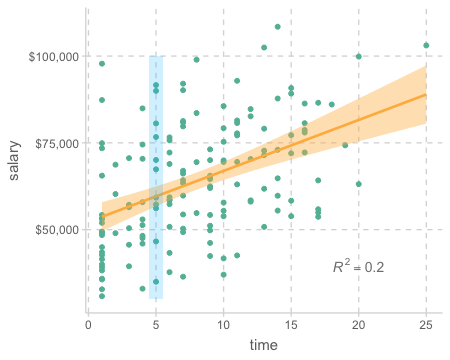

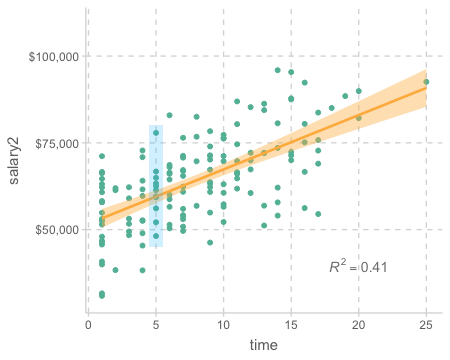

In [34]:
#| echo: false
#| layout-ncol: 2
set.seed(123)

acad9 <- read_csv("Cohen/data/c0904dt.csv")
mod_9 <- lm(salary ~ time, data = acad9)

acad9 <- acad9 |>
    add_residuals(mod_9) |>
    mutate(
        resid2 = resid * 0.8 + rnorm(150, sd = 10000),
        salary2 = salary - resid2
    )

mod_9s <- lm(salary2 ~ time, data = acad9)

acad9 |>
    ggplot(aes(x = time, y = salary)) +
    geom_point() +
    geom_smooth(method = lm) +
    scale_y_continuous(label = scales::label_dollar()) +
    annotate("text",
        x = 20, y = 40000, size = 4,
        label = paste("italic(R^2) ==", round(summary(mod_9)$r.squared, 2)),
        color = "grey50", parse = TRUE
    ) +
    coord_cartesian(ylim = c(30000, 110000)) +
    annotate("rect", xmin = 4.5, xmax = 5.5, ymin = 30000, ymax = 100000, alpha = .2, fill = "deepskyblue")
    
acad9 |>
    ggplot(aes(x = time, y = salary2)) +
    geom_point() +
    geom_smooth(method = lm) +
    scale_y_continuous(label = scales::label_dollar()) +
    annotate("text",
        x = 20, y = 40000, size = 4,
        label = paste("italic(R^2) ==", round(summary(mod_9s)$r.squared, 2)),
        color = "grey50", parse = TRUE
    ) +
    coord_cartesian(ylim = c(30000, 110000)) +
    annotate("rect", xmin = 4.5, xmax = 5.5, ymin = 45000, ymax = 80000, alpha = .2, fill = "deepskyblue")

Exercises

출판물의 수(`pubs`)가 연봉(`salary`)에 어떻게 영향을 미치는지 살펴보세요.


## Case 2
다음 데이터는 the Octogenarian Twin Study of Aging에서 나타나는 패턴을 기반으로 생성한 데이터

[*Longitudinal Analysis: Modeling Within-Person Fluctuation and Change*](https://www.pilesofvariance.com/index.html) by Lesa Hoffman

> includes 550 older adults age 80 to 97 years.  
> Cognition was assessed by the Information Test, a measure of general world knowledge (i.e., crystallized intelligence; range = 0 to 44)  
> demgroup 1: those who will not be diagnosed with dementia (none group = 1; 72.55%),  
> demgroup 2: those who will eventually be diagnosed with dementia later in the study (future group = 2; 19.82%)  
> demgroup 3: those who already have been diagnosed with dementia (current group = 3; 7.64%)

In [114]:
cognition <- read_csv("data/spss_chapter2.csv")
cognition |> print()

Rows: 550 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (6): PersonID, cognition, age, grip, sexMW, demgroup

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# A tibble: 550 × 6
  PersonID cognition   age  grip sexMW demgroup
     <dbl>     <dbl> <dbl> <dbl> <dbl>    <dbl>
1        1        23  92.6     9     1        1
2        2        24  91.8    11     0        2
3        3        29  92.6    12     0        1
4        4        16  94.4     6     1        1
5        5        27  85.8     9     1        1
6        6        37  83.1    11     0        1
# … with 544 more rows


::: {.callout-note collapse=true}
#### code for ggpairs
```r
trendlines <- function(data, mapping, ...){
    ggplot(data = data, mapping = mapping) + 
        geom_point(alpha = .6) + 
        geom_smooth(method = loess, se = FALSE, color = "orange", ...) +
        geom_smooth(method = lm, se = FALSE, color = "skyblue", ...)
}

ggpairs2 <- function(data, ...) {
    GGally::ggpairs(data, lower = list(continuous = trendlines))
}

ggpairs2(cognition, columns = 2:6)
```
:::

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


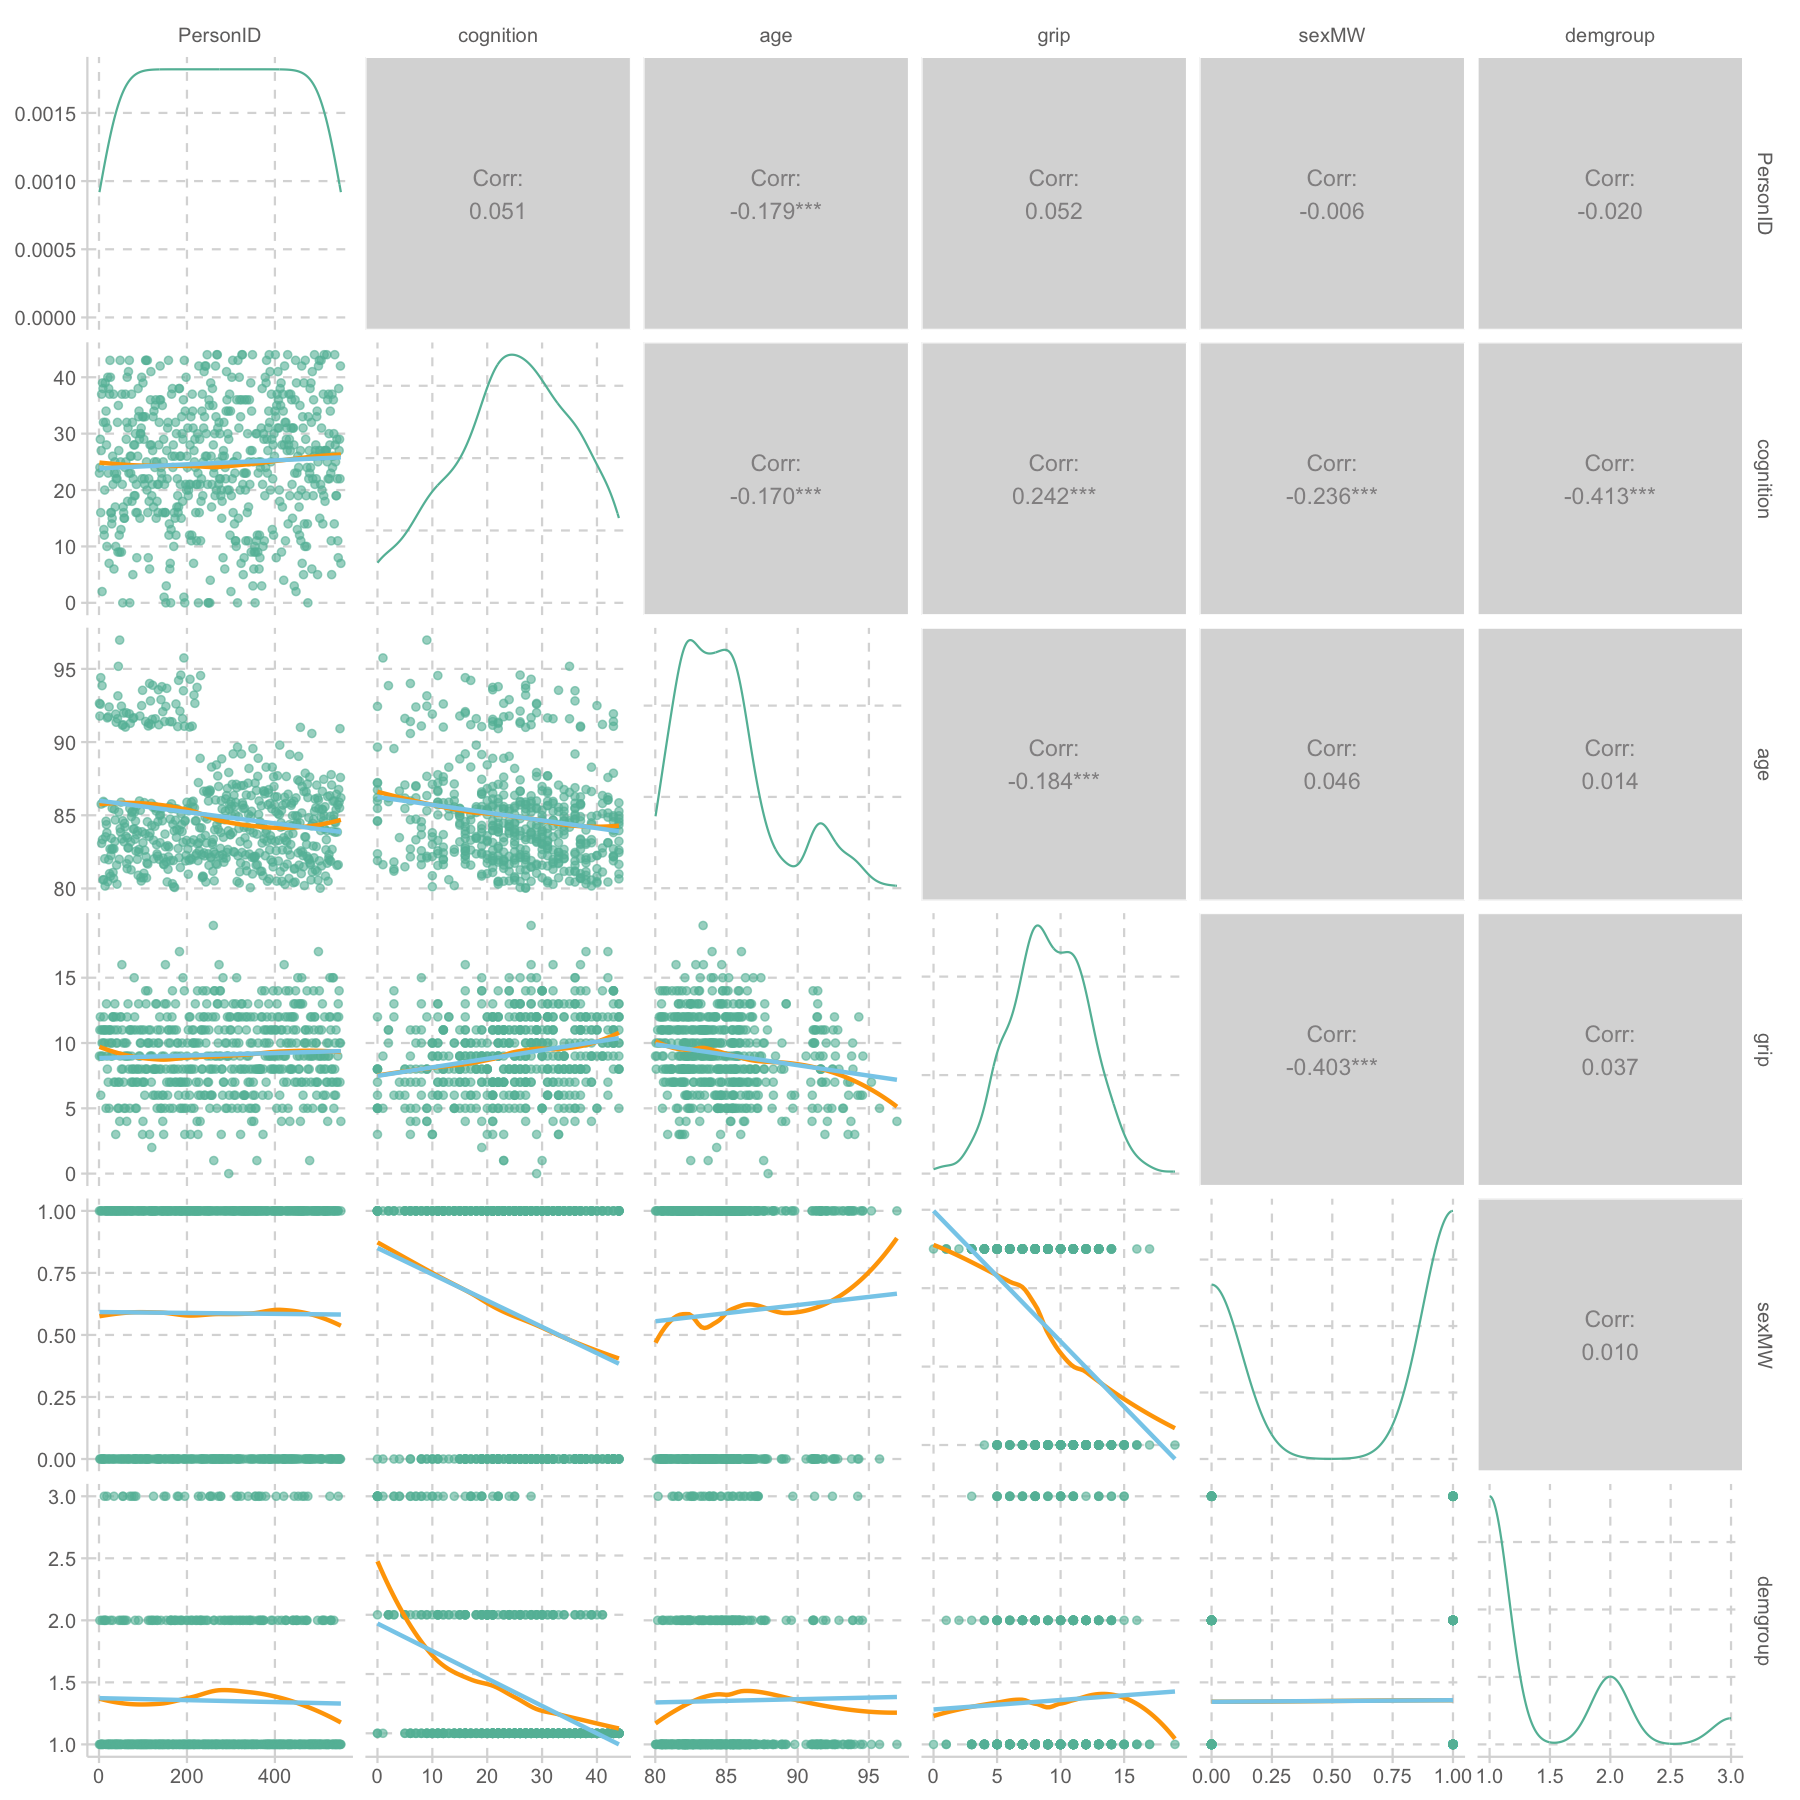

In [69]:
#| echo: false
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 150)

trendlines <- function(data, mapping, ...){
    ggplot(data = data, mapping = mapping) + 
        geom_point(alpha = .6) + 
        geom_smooth(method = loess, se = FALSE, color = "orange", ...) +
        geom_smooth(method = lm, se = FALSE, color = "skyblue", ...)
}

ggpairs2 <- function(data, ...) {
    GGally::ggpairs(data, lower = list(continuous = trendlines))
}

ggpairs2(cognition, columns = 2:6)

In [67]:
library(psych)
corr.test(cognition[-1])$r |>  # r만 선택, inference부분 제외
    round(2) |>
    print()

          cognition   age  grip sexMW demgroup
cognition      1.00 -0.17  0.24 -0.24    -0.41
age           -0.17  1.00 -0.18  0.05     0.01
grip           0.24 -0.18  1.00 -0.40     0.04
sexMW         -0.24  0.05 -0.40  1.00     0.01
demgroup      -0.41  0.01  0.04  0.01     1.00


In [59]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 90)

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


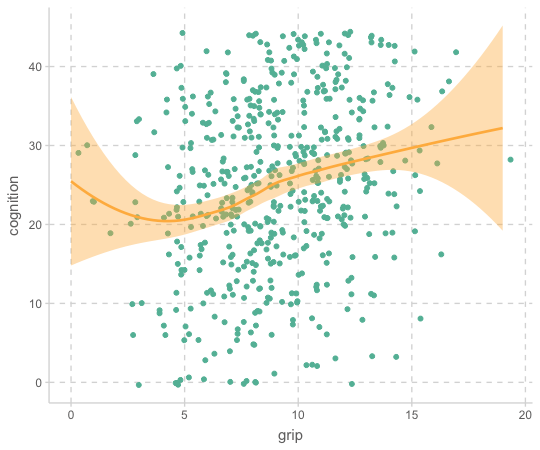

In [61]:
cognition |>
    ggplot(aes(x = grip, y = cognition)) +
    geom_jitter() +
    geom_smooth()

In [62]:
mod_cog <- lm(cognition ~ grip, data = cognition)
summary(mod_cog)


Call:
lm(formula = cognition ~ grip, data = cognition)

Residuals:
     Min       1Q   Median       3Q      Max 
-27.3941  -7.1578   0.3877   8.8377  22.8422 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  16.7033     1.4640  11.409  < 2e-16 ***
grip          0.8909     0.1527   5.834 9.24e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.67 on 548 degrees of freedom
Multiple R-squared:  0.05848,	Adjusted R-squared:  0.05677 
F-statistic: 34.04 on 1 and 548 DF,  p-value: 9.244e-09


기울기 0.89를 의미있게 해석할 수 있는가?

### 변수의 정규화  
standardize/normalize: &nbsp; $\displaystyle z = \frac{x-m}{sd}; ~ax+b$ : zoom + translate

- 변수를 정규화하면 평균이 0이고, 표준편차가 1로 변환
- 변수가 대략적으로 정규분포(normal distribution)을 따를 때,
- **내재적인 단위**가 없는 측정치들의 경우 그 값을 정규화시키면 해석이 용이하며,
- 표준편차(sd)가 그 눈금/단위가 됨으로써 변수에 상관없이 동일한 눈금을 갖게 되어, 변수들 간의 비교가 가능해짐
  - 즉, 정규화된 변수의 1은 1sd를 의미
- 또한, 평균이 0이 됨으로써 선형모형에서 용이한 trick을 제공해 줌
- 변수를 정규화해도 사실상 중요한 통계치는 변화하지 않음; 상관계수, $R^2$, $p$ value 등
    - 좀 더 일반적으로 linear transform에 의해서 변하지 않음; 온도 C/F
- 반면, 주어진 샘플의 평균과 표준편차를 사용하므로 샘플마다 변동이 생길 수 있음을 인지해야 함.

In [115]:
 cognition <- cognition |>
     select(cog_std = cognition, grip_std = grip) |>
     scale() |>  # standardize 함수
     bind_cols(cognition)  # column bind: 열 방향으로 두 데이터프레임을 붙힘

cognition |> print()

# A tibble: 550 × 8
  cog_std grip_std PersonID cognition   age  grip sexMW demgroup
    <dbl>    <dbl>    <dbl>     <dbl> <dbl> <dbl> <dbl>    <dbl>
1 -0.166   -0.0378        1        23  92.6     9     1        1
2 -0.0748   0.633         2        24  91.8    11     0        2
3  0.380    0.968         3        29  92.6    12     0        1
4 -0.803   -1.04          4        16  94.4     6     1        1
5  0.198   -0.0378        5        27  85.8     9     1        1
6  1.11     0.633         6        37  83.1    11     0        1
# … with 544 more rows


In [85]:
#| echo: false
options(repr.plot.width = 6, repr.plot.height = 5, repr.plot.res = 90)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


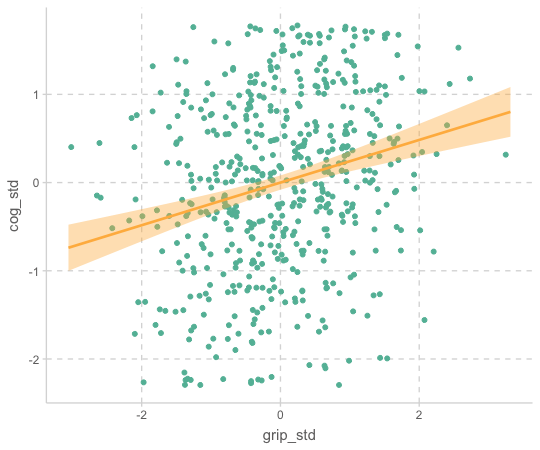

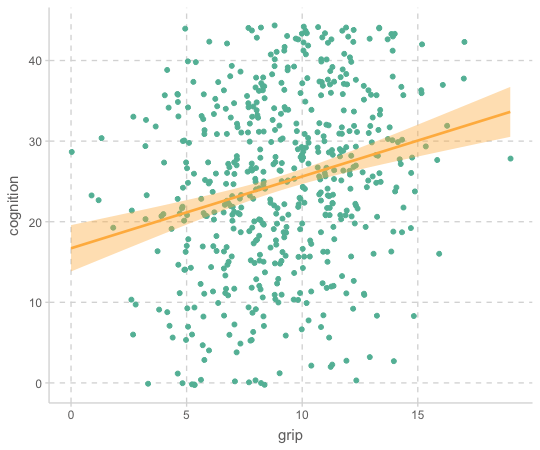

In [89]:
#| layout-ncol: 2
cognition |>
    ggplot(aes(x = grip_std, y = cog_std)) +
    geom_jitter() +
    geom_smooth(method=lm)

cognition |>
    ggplot(aes(x = grip, y = cognition)) +
    geom_jitter() + 
    geom_smooth(method=lm)


In [105]:
#| echo: false
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 80)

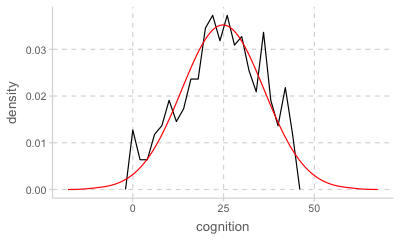

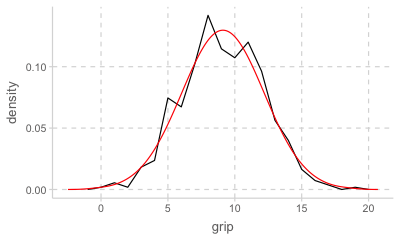

In [108]:
#| layout-ncol: 2
library(ggpubr)
cognition |>
    ggplot(aes(x = cognition, y = after_stat(density))) +
    geom_freqpoly(binwidth=2) +
    stat_overlay_normal_density(color = "red")

cognition |>
    ggplot(aes(x = grip, y = after_stat(density))) +
    geom_freqpoly(binwidth=1) +
    stat_overlay_normal_density(color = "red")

Normal distribution 정규 분포; 사실상 sd만으로 결정되는 분포 곡선

![](images/normal.png){width=600}  
&nbsp; Source: *The Truthful Art* by Albert Cairo

In [113]:
mod_cog_std <- lm(cog_std ~ grip_std, data = cognition)
summary(mod_cog_std) |> print(digits = 2)


Call:
lm(formula = cog_std ~ grip_std, data = cognition)

Residuals:
   Min     1Q Median     3Q    Max 
-2.493 -0.651  0.035  0.804  2.079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.2e-16    4.1e-02     0.0        1    
grip_std     2.4e-01    4.1e-02     5.8    9e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.97 on 548 degrees of freedom
Multiple R-squared:  0.058,	Adjusted R-squared:  0.057 
F-statistic:  34 on 1 and 548 DF,  p-value: 9.2e-09



$R^2$ 와 *p values*는 변함이 없으며, intercept (y 절편)은 0